# Background

Uber is an increasingly popular ride-share app used in many large US cities, including New York City. Riders request a pick-up in the form of pool (where other rides can be picked up and dropped off on the way), X (a private 4-person car), or XL (a private 6 or 7-person car). Common reasons people use Uber are lack of public transportation (common in LA), lack of private transportation (common in NYC), avoiding drunk driving, lack of parking at destination, cost efficiency, and going to the airport, among many other reasons.

### Uber Dataset

This specific data set from Yannis Pappas found on Kaggle is called "NYC Uber Pickups with Weather and Holidays". Yannis Pappas took a subset of the data from FiveThirtyEight's "Uber Pickups in New York City" that originally had from 20 million ride-shares. He combined it with weather data from the National Centers for Environmental Information and NYC Public Holidays.

The purpose of the data set was to show trends in uber pickups with different weather and holiday variables.

The data covers each day of January through June in 2015 and groups pickups by the hour and borough they are called in. For example, the first line is January 1st, 2015 from midnight to 1 am in the Bronx. The rest of the variables in the first row are based on this date, time, and place.

### Variables

    *pickup_dt*: Pick-up date & time
    Pandas datetime object
    The date and hour that the group of pick-ups occured, pre-grouped by hour
    Units: time (MM/DD/YYYY HH:MM)

    *borough*: NYC Borough
    Categorical
    New York City is split into 5 boroughs, but this variables also includes Newark Airport
    Categories: Bronx, Brooklyn, Manhattan, Queens, Staten Island, EWR

    *pickups*: Number of Pick-ups
    Integer (int64)
    The number of Uber pick-ups in the specified borough and the pickup_dt, pre-grouped by hour
    Units: none

    *windspeed*: Windspeed
    Numeric (float64)
    The average windspeed in the specified borough at that hour
    Units: miles/hour

    *visibility*: Visibility
    Numeric (float64)
    Visibility in miles rounded to the nearest tenth - "the distance one can see as determined by light and weather conditions"
    Units: miles

    *temp*: Temperature
    Numeric (float64)
    The temperature outside
    Units: degrees Fahrenheit

    *dewpoint*: Dew Point
    Numeric (float64)
    Dew point temperature - "the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form"
    Units: degrees Fahrenheit

    *slpressure*: Sea Level Pressure
    Numeric (float64)
    The average atmospheric pressure at sea level
    Units: mbar

    *pcp01*: 1-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 1 hour
    Units: inches

    *pcp06*: 6-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 6 hours
    Units: inches
    
    *pcp24*: 24-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 24 hours
    Units: inches
    
    *snow*: Snow
    Numeric (float64)
    Amount of snow fall depth in inches
    Units: inches
    
    *holiday*: Holiday
    Categorical
    Whether the specified day in pickup_dt is a holiday or not, uses yes/no response
    Categories: Y, N

### Pre-Analysis Thoughts

Based on our personal experiences with Uber, an app our group and many other college students frequently use, we believe that worse weather will correlate with an increase in pickups. We also believe that there will be less pickups on holidays than non-holidays.

The reasoning behind these beliefs is that in a city, walking is fairly common due to the density and proximity of stores, work, and other necessities. When it is raining, snowing, or otherwise bad weater, it makes sense to Uber instead of walking in bad weather. Temperature will most likely not show a difference in pick-ups, but we believe that windspeed, precipitation, and snow will.

We believe there will be less pickups on holidays because people usually stay home on the holidays. Masses of people travel on the days right before and right after holidays but generally not on actual holidays. This is why we believe there will be less pickups on those days.

# Exploratory Analysis of the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv('uber_nyc_enriched.csv')

In [19]:
uber.head(10)

,pickup_dt,borough,pickups,windspeed,visibility,temp,dewpoint,slpressure,pcp01,pcp06,pcp24,snow,holiday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [4]:
uber.pickup_dt = pd.to_datetime(uber['pickup_dt'],format='%m/%d/%Y %H:%M')

In [5]:
uber.head(10)

,pickup_dt,borough,pickups,windspeed,visibility,temp,dewpoint,slpressure,pcp01,pcp06,pcp24,snow,holiday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [16]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
pickup_dt     29101 non-null datetime64[ns]
borough       26058 non-null object
pickups       29101 non-null int64
windspeed     29101 non-null float64
visibility    29101 non-null float64
temp          29101 non-null float64
dewpoint      29101 non-null float64
slpressure    29101 non-null float64
pcp01         29101 non-null float64
pcp06         29101 non-null float64
pcp24         29101 non-null float64
snow          29101 non-null float64
holiday       29101 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [6]:
manhattan = uber[uber.borough == "Manhattan"]

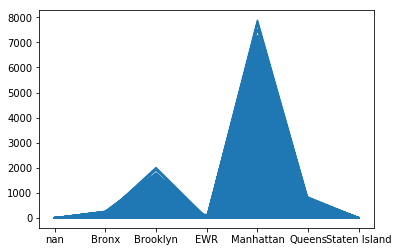

In [7]:
plt.plot(uber.borough, uber.pickups)
plt.show()

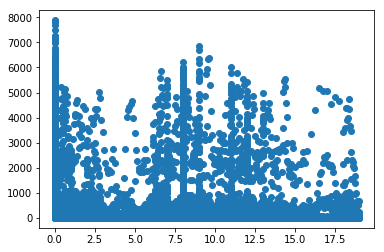

In [8]:
plt.scatter(uber.snow, uber.pickups)
plt.show()

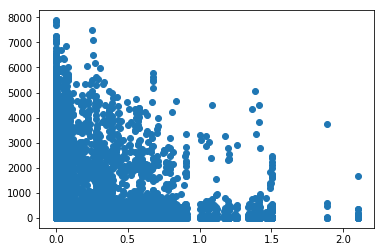

In [9]:
plt.scatter(uber.pcp24, uber.pickups)
plt.show()

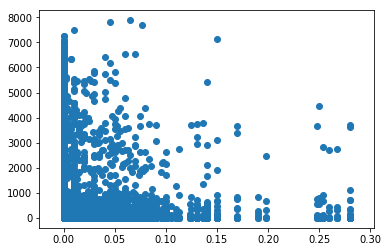

In [10]:
plt.scatter(uber.pcp01, uber.pickups)
plt.show()

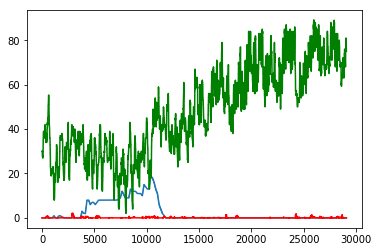

In [11]:
plt.plot(uber.snow)
plt.plot(uber.pcp24, color = 'red')
plt.plot(uber.temp, color = 'green')
plt.show()

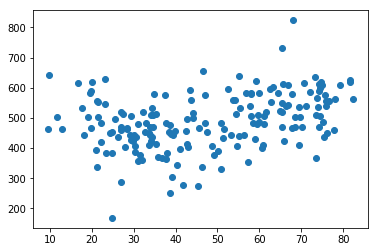

In [12]:
plt.scatter(uber.resample('D', on='pickup_dt').temp.mean(), uber.resample('D', on='pickup_dt').pickups.mean())
plt.show()

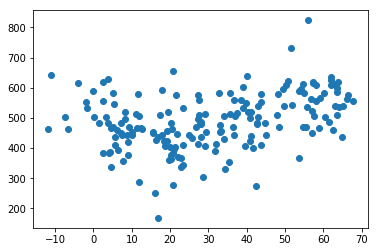

In [13]:
plt.scatter(uber.resample('D', on='pickup_dt').dewpoint.mean(), uber.resample('D', on='pickup_dt').pickups.mean())
plt.show()

In [14]:
ahpu = uber.groupby(['borough', 'holiday']).pickups.mean()
ahpu.head(10)

borough    holiday
Bronx      N            50.771073
           Y            48.065868
Brooklyn   N           534.727969
           Y           527.011976
EWR        N             0.023467
           Y             0.041916
Manhattan  N          2401.302921
           Y          2035.928144
Queens     N           308.899904
           Y           320.730539
Name: pickups, dtype: float64

In [15]:
uber.resample('M', on='pickup_dt').pickups.mean()

pickup_dt
2015-01-31    397.755360
2015-02-28    503.879564
2015-03-31    456.265887
2015-04-30    475.165069
2015-05-31    533.143140
2015-06-30    574.882221
Freq: M, Name: pickups, dtype: float64

# Data Modeling